![](GooglePlay.png)

# Step 0: Import Libraries

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
%matplotlib inline
import os
from wordcloud import WordCloud, STOPWORDS

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, precision_score


# Step 1: Read the Dataset


In [293]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [294]:
#detect how many rows and columns
df.shape

(10841, 13)

In [295]:
#get some info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Step 2: Clean DataSet
 
 ## A. Columns
       . Replace space --> Underscore
       . Strip white spaces
      

In [296]:
#Replace space --> Underscore & Strip white spaces
df.columns = df.columns.str.replace(' ', '_').str.strip()
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

## B. Row

    . Check dtypes
    . Check for missing
    . Check for duplicates

In [297]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [298]:
#chaeck data types
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [299]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [300]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [301]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object

In [302]:
#Find the rows that have "Free" index 
df[df["Installs"]=="Free"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [303]:
# Drop Bad Row that    
df = df.drop(10472)

In [304]:
print(df.shape)

(10840, 13)


In [305]:
#Convert data type
df['Reviews'] = df['Reviews'].astype('int')

df['Price'] = df['Price'].str.replace('$', '').astype('float')

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype('int')

df['Size'] = df['Size'].str.replace('M','').str.replace('K','000').str.replace('k','000').str.replace('Varies with device', '0').astype('float')


In [306]:
df['Size'] = df['Size'].astype('int')

In [307]:
#Check total number of missing cells
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

In [308]:
#fill the missing 
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Type'] = df['Type'].fillna(df['Type'].mode ()[0])
df['Current_Ver'] = df['Current_Ver'].fillna(df['Current_Ver'].mode ()[0])
df['Android_Ver'] = df['Android_Ver'].fillna(df['Android_Ver'].mode ()[0])

In [309]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [310]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [311]:
#Check for duplicates
df.duplicated().sum()

483

In [312]:
#drop duplicates
df=df.drop_duplicates( keep = 'last')
df.shape

(10357, 13)

In [313]:
df.describe().round()

,Rating,Reviews,Size,Installs,Price
count,10357.0,10357.0,10357.0,1.035700e+04,10357.0
mean,4.0,405905.0,13666.0,1.415776e+07,1.0
std,0.0,2696778.0,93537.0,8.023955e+07,16.0
min,1.0,0.0,0.0,0.000000e+00,0.0
25%,4.0,32.0,3.0,1.000000e+03,0.0
50%,4.0,1680.0,10.0,1.000000e+05,0.0
75%,4.0,46416.0,29.0,1.000000e+06,0.0
max,5.0,78158306.0,1020000.0,1.000000e+09,400.0


In [314]:
#replace all cells in the size column that have zero value 
df['Size'] = df['Size'].replace(0, df['Size'].mean())

In [315]:
df.describe().round()

,Rating,Reviews,Size,Installs,Price
count,10357.0,10357.0,10357.0,1.035700e+04,10357.0
mean,4.0,405905.0,15679.0,1.415776e+07,1.0
std,0.0,2696778.0,93368.0,8.023955e+07,16.0
min,1.0,0.0,1.0,0.000000e+00,0.0
25%,4.0,32.0,6.0,1.000000e+03,0.0
50%,4.0,1680.0,20.0,1.000000e+05,0.0
75%,4.0,46416.0,59.0,1.000000e+06,0.0
max,5.0,78158306.0,1020000.0,1.000000e+09,400.0


# Step 3: EDA

Text(0.5, 1.0, 'App Rating')

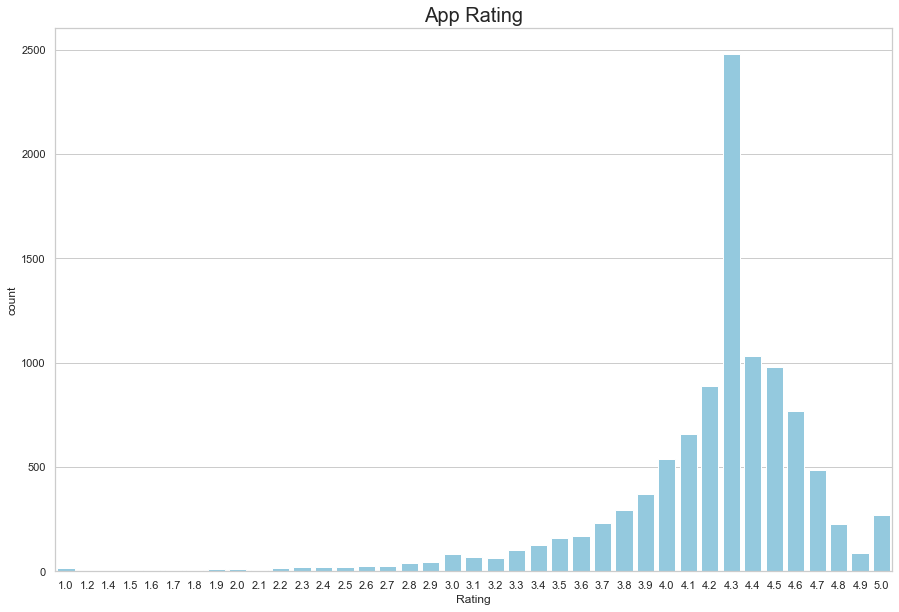

In [316]:
# Check Target --> Rating (balanced or not??)
plt.figure(figsize = (15,10))
sns.set_theme(style='whitegrid', palette = "PuBuGn_r")
sns.countplot(x='Rating', data = df , color= "skyblue");
plt.title("App Rating", size=20 )

####  Most apps do well with an average rating of 4.4
## 
## 

Text(0.5, 1.0, 'App Rating vs Type')

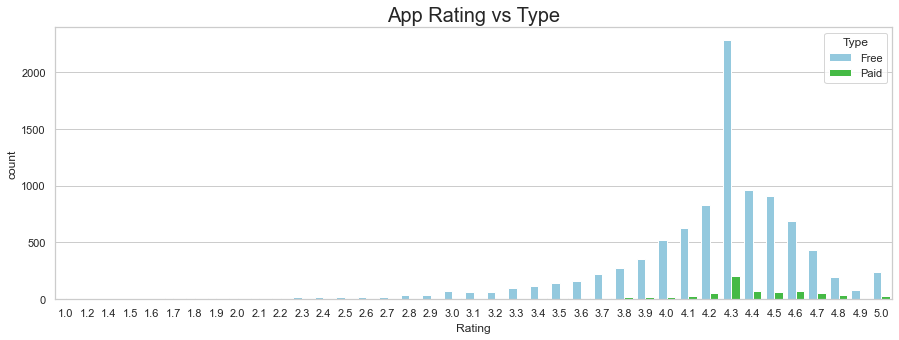

In [317]:
# 2-D Plot: Rating vs Type
plt.figure(figsize = (15,5))
c= ['skyblue' , 'limegreen','gold', 'red']

sns.countplot(x="Rating", hue="Type", data=df,  palette=c);
plt.title("App Rating vs Type", size=20 )

Text(0.5, 1.0, 'App Rating VS Reveiws')

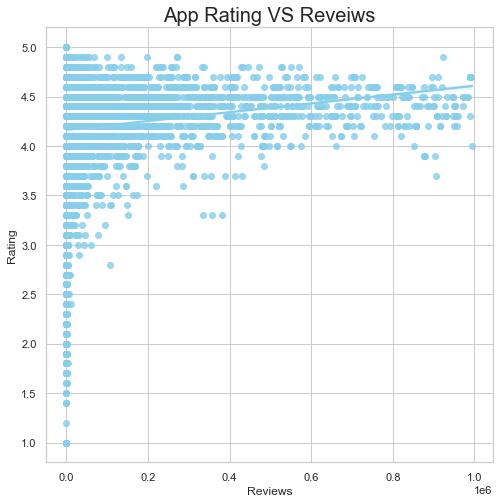

In [318]:
plt.figure(figsize = (8,8))
sns.regplot(x="Reviews", y="Rating", color = 'skyblue',data=df[df['Reviews']<1000000]);
plt.title('App Rating VS Reveiws',size = 20)

#### Apps with higher ratings tend to get more reviews
## 
## 


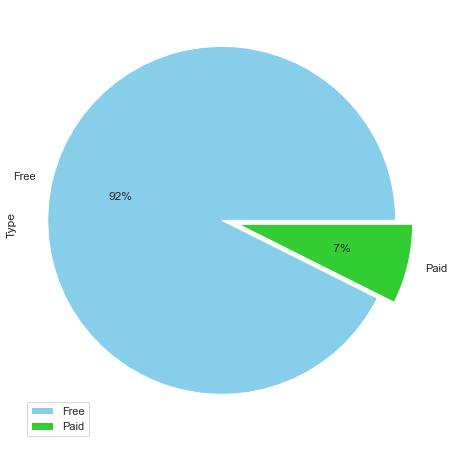

In [319]:
plt.figure(figsize=(8,8))
explode=[0.1,0]

df['Type'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode, colors=c )

plt.legend()

plt.show()

#### Most of the apps in the google store are free and Only 7% of the apps paid apps
## 
##  

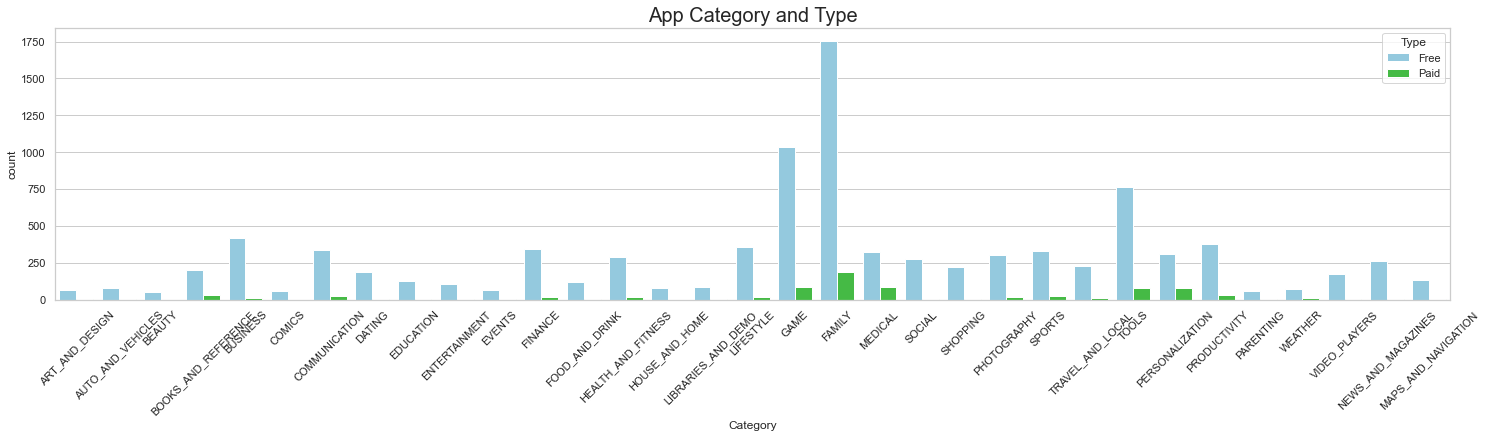

In [320]:
plt.figure(figsize = (25,5))
sns.countplot(x="Category", hue="Type", data=df,  palette=c);


plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("count")
plt.title("App Category and Type", size=20)
plt.show()

#### Family category is the most common category on the app store then game .
## 
## 

Text(0.5, 1.0, 'App Installs and Reviews')

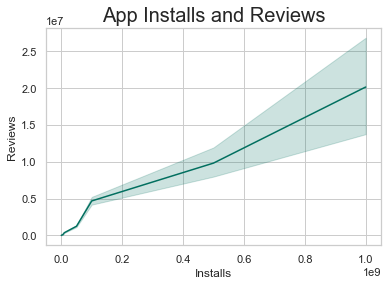

In [321]:
sns.set_theme(style='whitegrid', palette = "PuBuGn_r")
sns.lineplot(x="Installs", y="Reviews",data=df,   palette=c)
plt.title("App Installs and Reviews", size=20 )


####  Apps with more installs tends to have more reviews
## 
## 

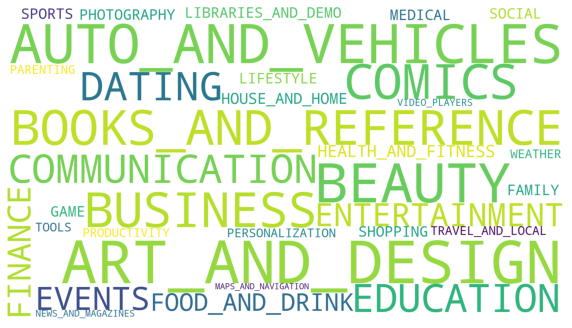

In [322]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category.unique()))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

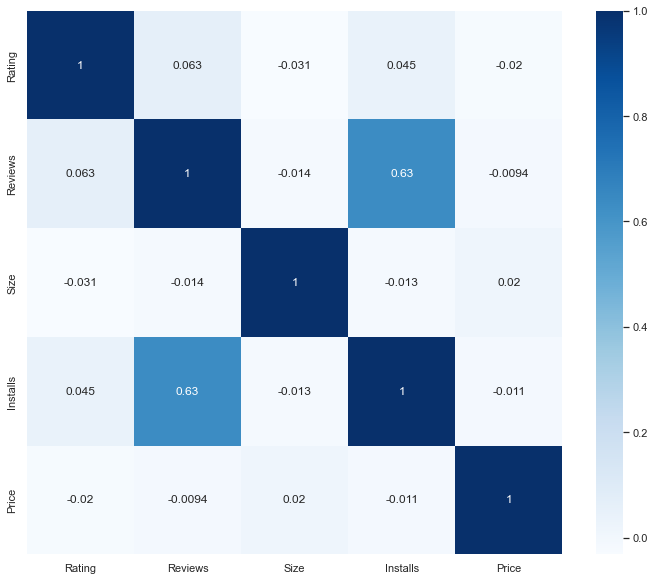

In [323]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True , cmap="Blues")
sns.light_palette("seagreen", as_cmap=True )
plt.show()

#### There is a positive correlation between installs and reviews. Apps with higher reviews have more installs
## 
## 

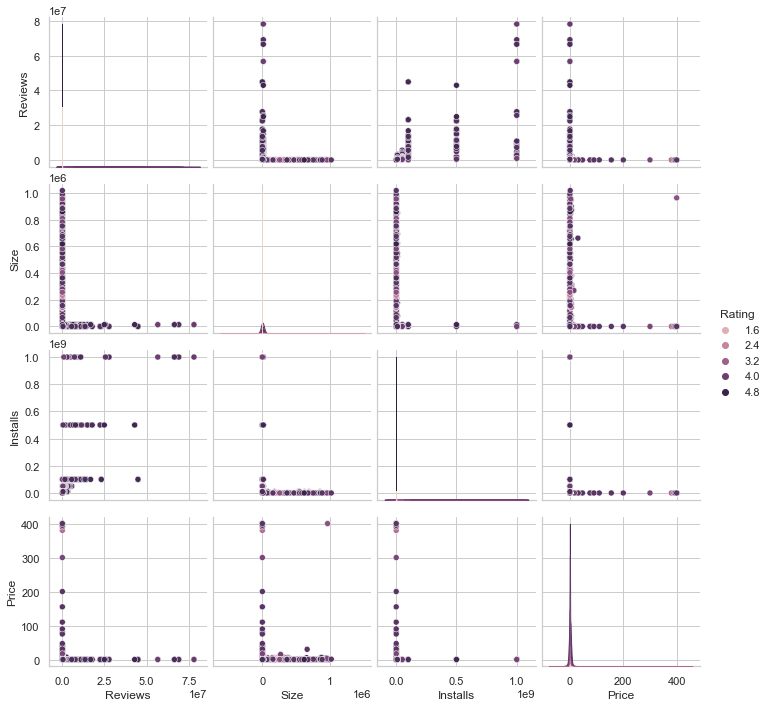

In [324]:
sns.pairplot(df,diag_kind='kde' , hue = 'Rating')

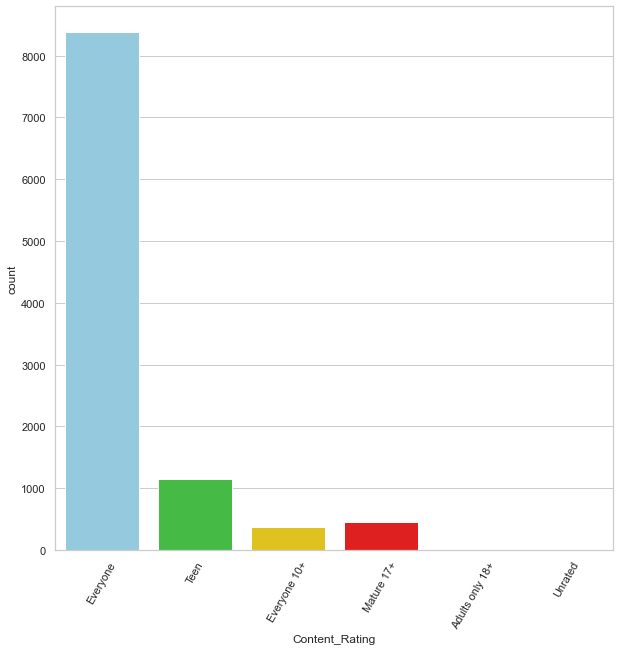

In [325]:
plt.subplots(figsize=(10,10))
sns.countplot(x='Content_Rating', data=df ,palette=c)
sns.color_palette()

plt.xticks(rotation=60)
plt.show()

#### In Content Rating, Everyone is the most Content apps in google store
## 
## 

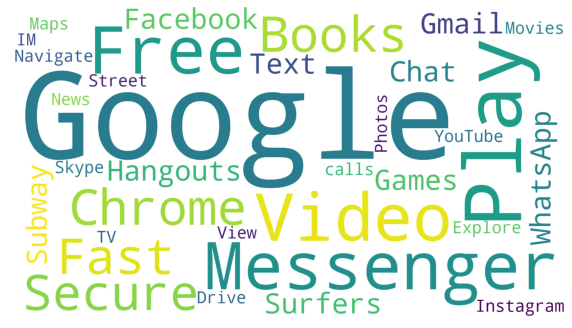

In [326]:
maxapp=df.loc[df['Installs'] == df['Installs'].max()]   # condition check
maxapp=maxapp['App'].unique()

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(maxapp))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [327]:
maxapp

array(['Google Play Books', 'Google Chrome: Fast & Secure', 'Hangouts',
       'WhatsApp Messenger', 'Messenger – Text and Video Chat for Free',
       'Gmail', 'Google Play Games', 'Subway Surfers', 'Facebook',
       'Google+', 'Instagram', 'Google Photos',
       'Maps - Navigate & Explore', 'Google Street View', 'Google',
       'Google Drive', 'YouTube', 'Google Play Movies & TV',
       'Google News', 'Skype - free IM & video calls'], dtype=object)

In [328]:
from IPython.display import Image

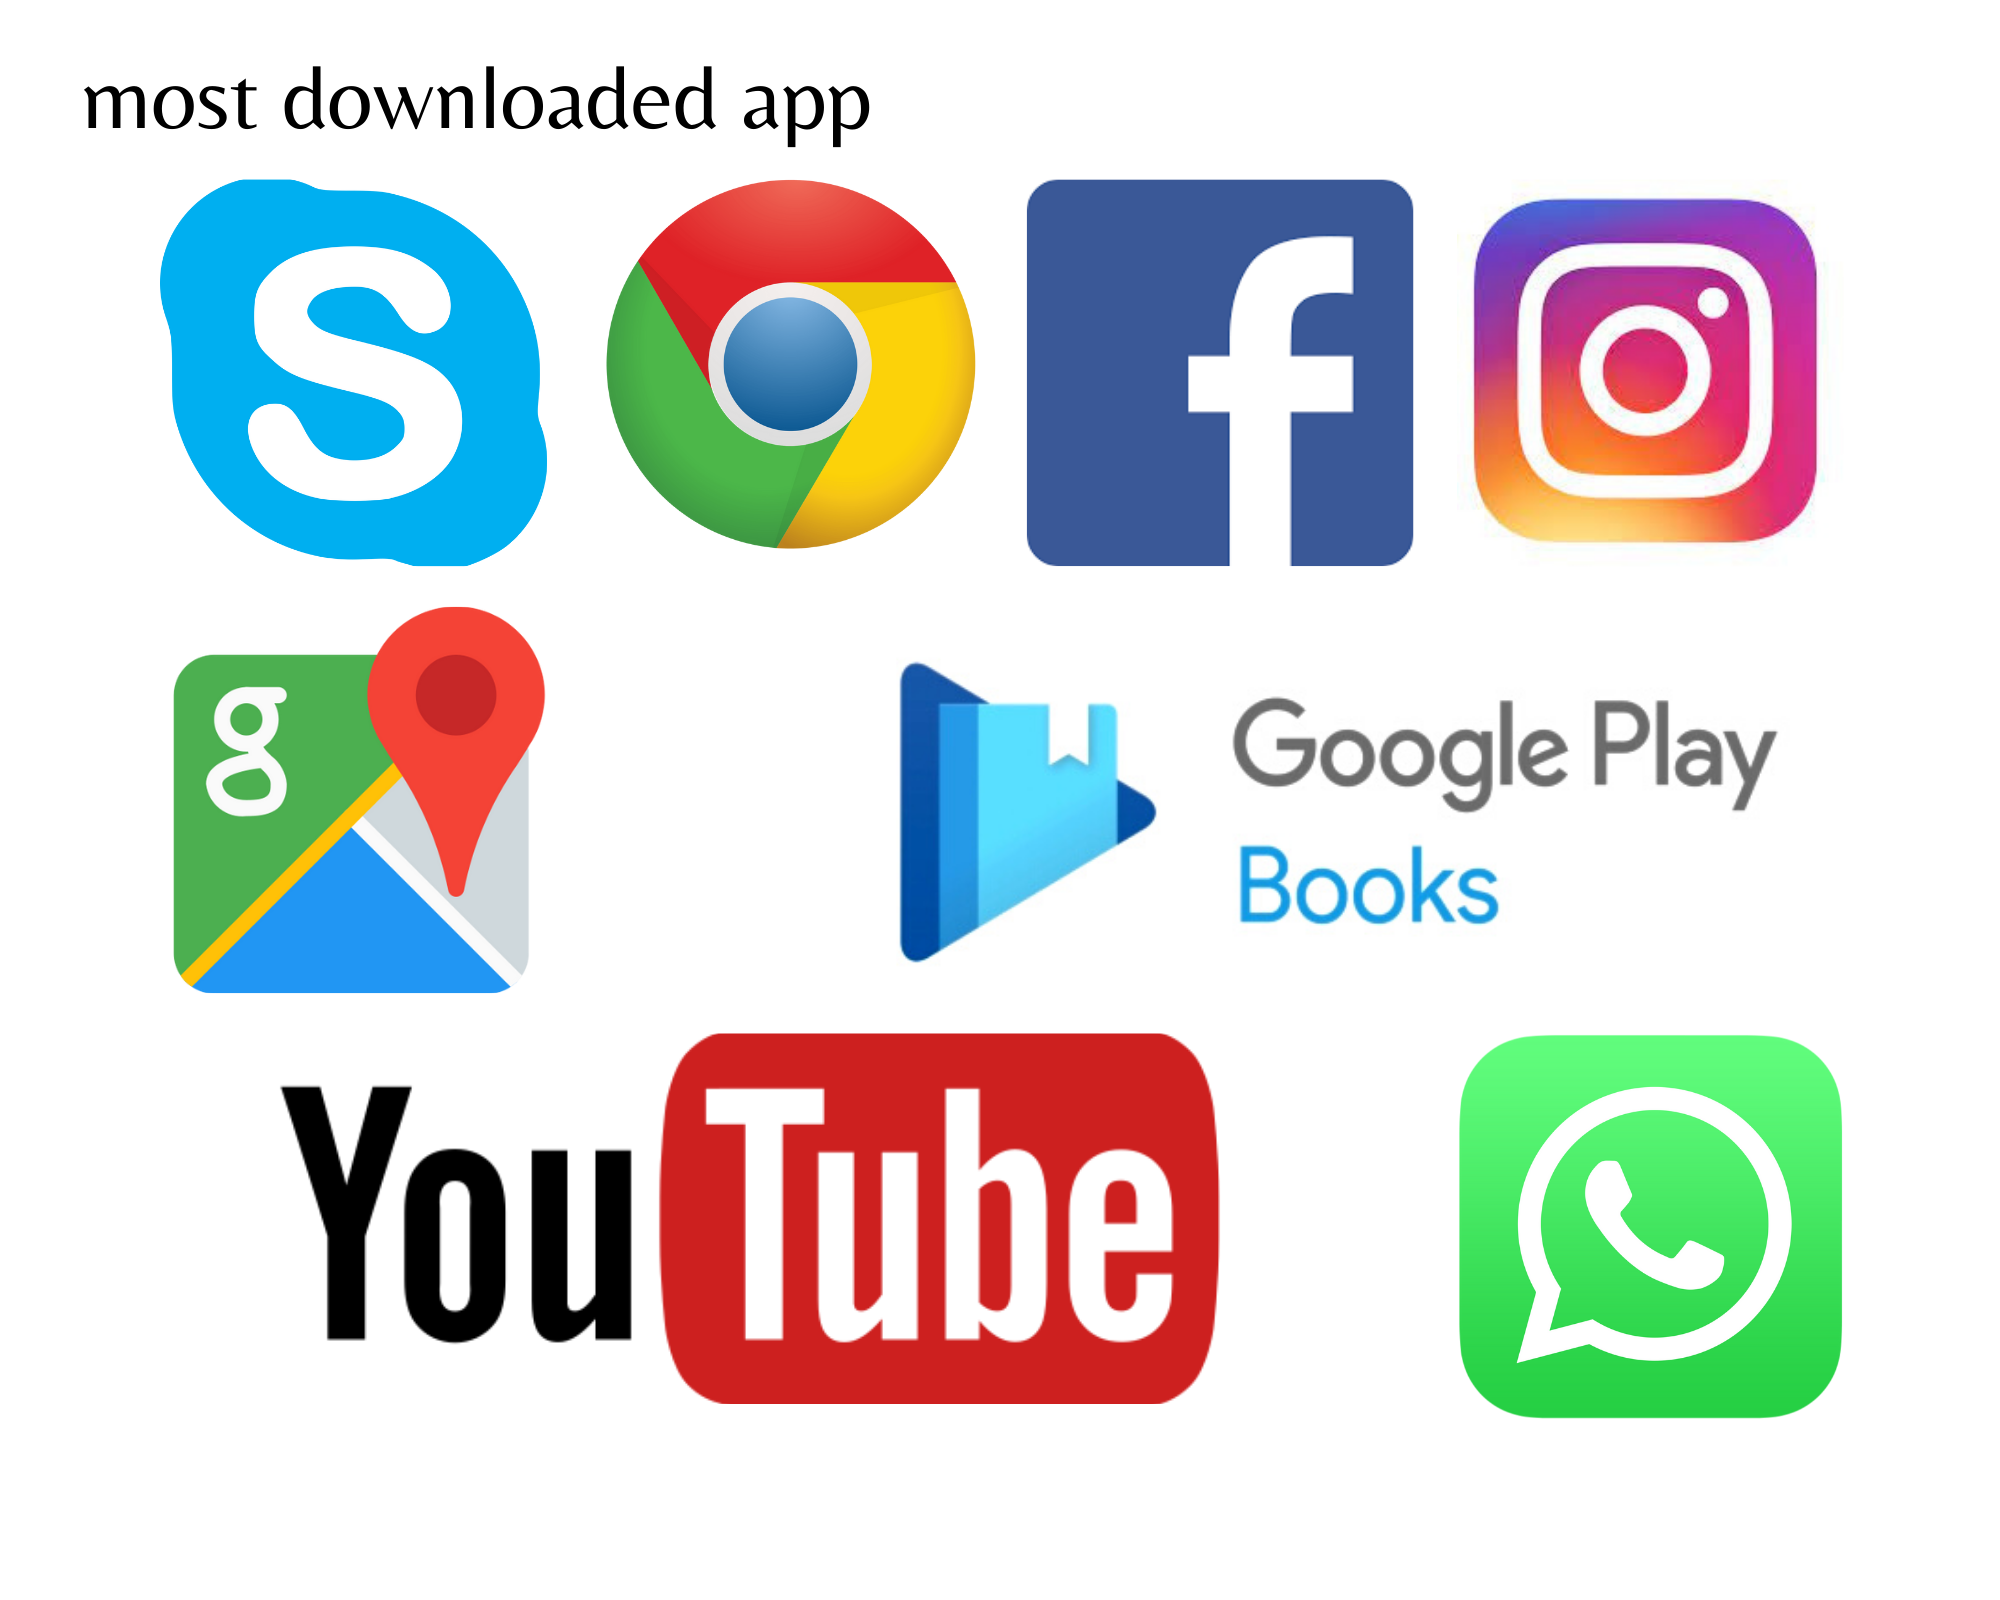

In [329]:
#some of the Top Download Apps
Image('app.png')


# 

## Preprocessing for modeling

In [330]:
#encoding
dummy_type=pd.get_dummies(df["Type"])
dummy_category=pd.get_dummies(df["Category"])

In [331]:
#Concatenating the dummy columns with the main dataframe.
df=pd.concat([df,dummy_type],axis=1)
df=pd.concat([df,dummy_category], axis=1)

In [332]:
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

le = preprocessing.LabelEncoder()
df['Content_Rating'] = le.fit_transform(df['Content_Rating'])


In [333]:
#dropping the type& category column.
df.drop(["Type"],axis=1,inplace=True)
df.drop(["Category"],axis=1,inplace=True)

df.head(1)


,App,Rating,Reviews,Size,Installs,Price,Content_Rating,Genres,Last_Updated,Current_Ver,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,1,9,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,0,0,0


# 

## Split Data

In [334]:
#detect input and output
X = df.drop(columns=['App','Rating', 'Android_Ver', 'Current_Ver','Last_Updated'], axis=1)
y = df.Rating
y=y.astype('int')
y

0        4
1        3
2        4
3        4
4        4
        ..
10836    4
10837    5
10838    4
10839    4
10840    4
Name: Rating, Length: 10357, dtype: int32

In [335]:
X.shape

(10357, 41)

In [336]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [337]:
X_train

,Reviews,Size,Installs,Price,Content_Rating,Genres,Free,Paid,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
3629,892,17.000000,10000,0.00,1,117,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4122,10790092,13665.759197,500000000,0.00,1,36,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2370,2159,11.000000,10000,0.00,1,71,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5114,1,3.000000,50,0.00,1,82,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3255,7790693,17.000000,500000000,0.00,1,108,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,8114,13665.759197,100000,2.49,1,108,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5674,498,11.000000,10000,0.00,1,108,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5873,26426,30.000000,1000000,0.00,1,43,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,464,8.000000,100000,0.00,1,59,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Step 4: Modelling

In [339]:
#apply Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, precision_score

lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [340]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_lr,y_test))



              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.67      0.01         3
           4       1.00      0.78      0.88      4140
           5       0.00      0.00      0.00         0

    accuracy                           0.78      4143
   macro avg       0.20      0.29      0.18      4143
weighted avg       1.00      0.78      0.88      4143



In [341]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [342]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           1       0.06      0.12      0.08         8
           2       0.04      0.08      0.05        37
           3       0.17      0.42      0.24       293
           4       0.94      0.81      0.87      3756
           5       0.14      0.33      0.20        49

    accuracy                           0.76      4143
   macro avg       0.27      0.35      0.29      4143
weighted avg       0.86      0.76      0.81      4143



In [343]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 5 )
KNN_model.fit(X_train_scaled, y_train)
y_pred_knn = KNN_model.predict(X_test)



In [344]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        81
           4       0.98      0.78      0.86      4062
           5       0.00      0.00      0.00         0

    accuracy                           0.76      4143
   macro avg       0.20      0.16      0.17      4143
weighted avg       0.96      0.76      0.85      4143



In [345]:
from sklearn.metrics import accuracy_score

res1=accuracy_score(y_test, y_pred_lr)
res3=accuracy_score(y_test, y_pred_knn)
res2=accuracy_score(y_test, y_pred_rf)

lst = [res1, res2,res3]
 

lst2 = ["Logistic Regression", "Random Forest", "K Nearest Neighbours"  ]



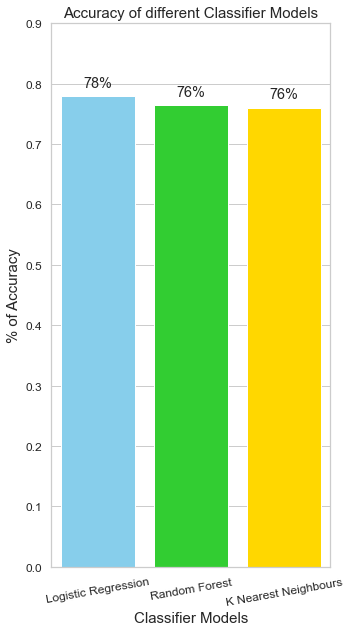

In [379]:

plt.figure(figsize=(5,10))

ax = sns.barplot( x = lst2 , y= lst ,  saturation =2.0, palette=c)


plt.xlabel('Classifier Models', fontsize = 15 )
plt.ylabel('% of Accuracy', fontsize = 15)
plt.title('Accuracy of different Classifier Models', fontsize = 15)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 10)
plt.yticks(fontsize = 12)
ax.set(ylim=(0, 0.9))

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height*100)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
    
    
plt.show()


# Step 5: Conclusion 

### After applying three different models to the dataset, we can conclude that the Logistic Regression model ranked the highest accuracy among the other models.

# 
# 
